In [5]:
import sys
import os

# Add parent directory to path so we can import from scripts/
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(".."), '..')))


In [14]:
#01_eda_sentiment_analysis.ipynb

# 1. Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

from scripts.preprocess import load_and_clean_data
from scripts.sentiment_analysis import apply_sentiment_scores
from scripts.hf_sentiment_model import apply_hf_sentiment


# Plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Load and preprocess data
file_path = "../data/Reviews.csv"
df = load_and_clean_data(file_path)
print(f"Dataset loaded: {df.shape[0]:,} rows")

# 3. Apply TextBlob and VADER sentiment
df = apply_sentiment_scores(df)

# 4. Apply Hugging Face sentiment (sample only for speed)
df_sample = apply_hf_sentiment(df, sample_size=1000)

# Save results for later
df_sample.to_csv("../results/sentiment_scores.csv", index=False)


Dataset loaded: 525,814 rows


# EDA & Visualizations

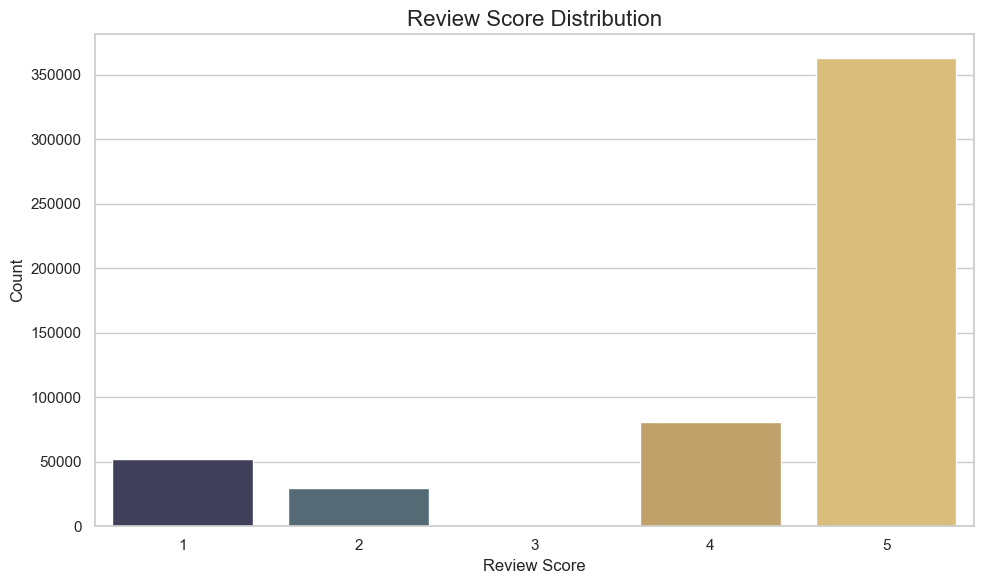

In [34]:
# Ensure directory exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Make sure Score is integer for the palette mapping to work
df['Score'] = df['Score'].astype(int)

# Custom color palette matching the banner style
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # soft gold (optional, for neutral class)
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

# Sort scores for consistent coloring
score_order = [1, 2, 3, 4, 5]

sns.countplot(x="Score", data=df, hue="Score", palette=custom_palette, order=score_order, legend=False)
plt.title("Review Score Distribution", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("../visuals/histograms/review_score_distribution.png")
plt.show()


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/2024339019.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


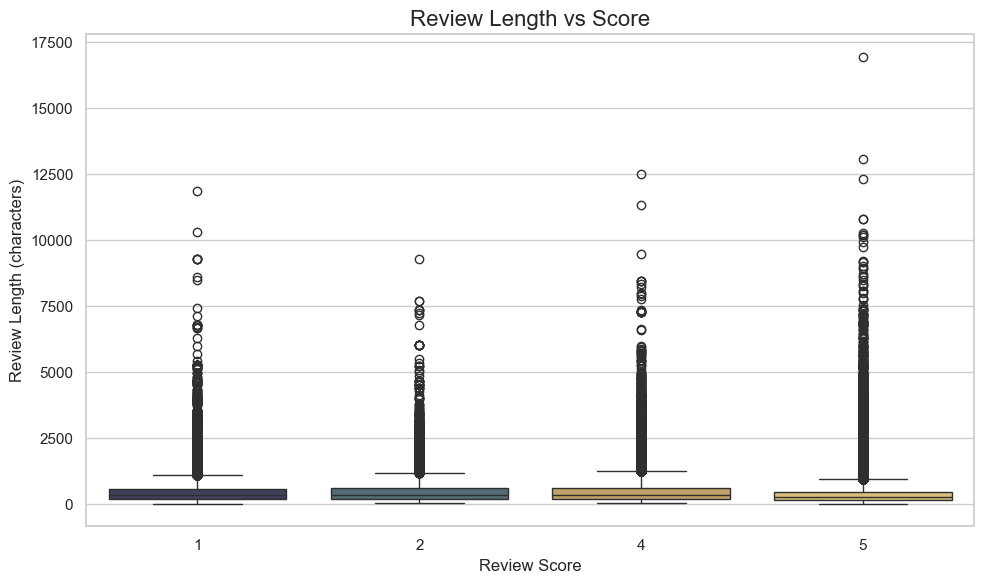

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure output directory exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Define custom color palette
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # optional if Score=3 is included
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

# Make sure Score is integer
df['Score'] = df['Score'].astype(int)

# Plot with matching colors using palette lookup
sns.boxplot(
    x="Score",
    y="review_length",
    data=df,
    palette=[custom_palette.get(score, "#CCCCCC") for score in sorted(df["Score"].unique())]
)

plt.title("Review Length vs Score", fontsize=16)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Review Length (characters)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig("../visuals/histograms/review_length_vs_score.png")
plt.show()


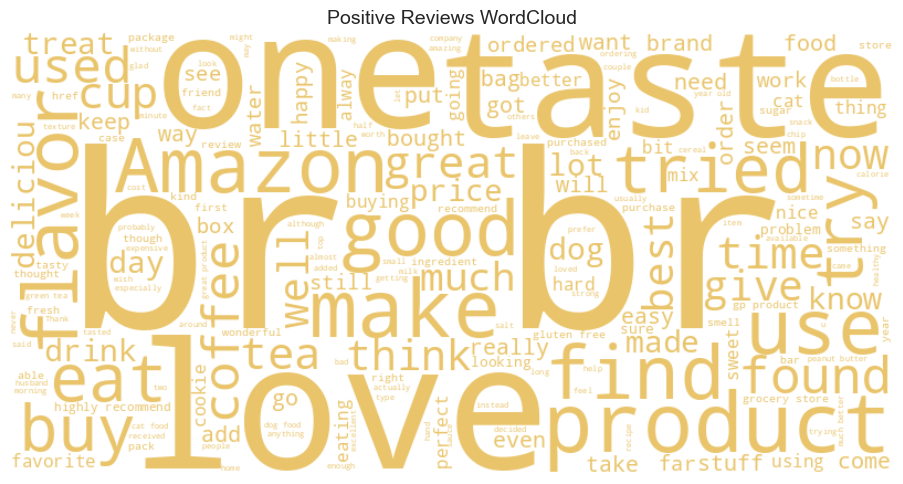

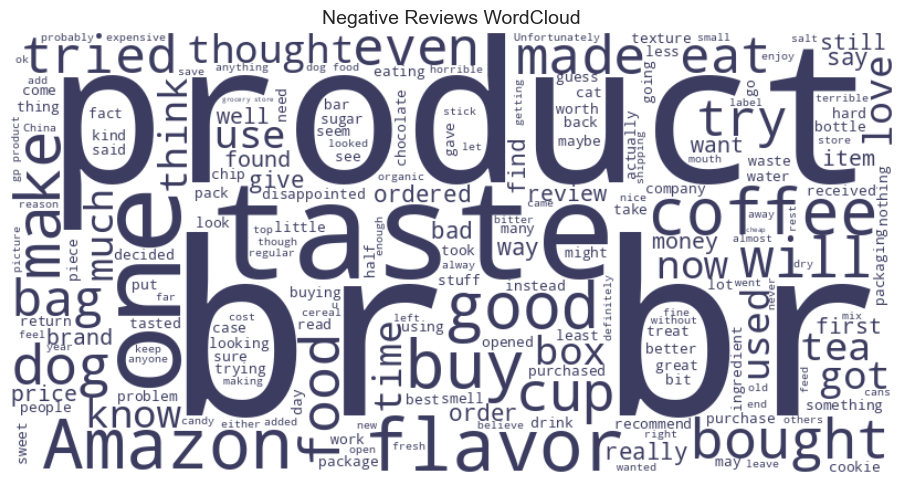

In [19]:
# Ensure output directory exists
os.makedirs("../visuals/wordclouds", exist_ok=True)

# Custom color functions
def gold_color_func(*args, **kwargs):
    return "#E9C46A"  # light gold for positive reviews

def navy_color_func(*args, **kwargs):
    return "#3B3C60"  # deep navy for negative reviews

# WordCloud generation
def generate_wordcloud(text_series, label, color_func, save_path):
    words = " ".join(text_series)
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud.recolor(color_func=color_func), interpolation='bilinear')
    plt.axis("off")
    plt.title(f"{label} Reviews WordCloud", fontsize=14)
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Generate brand-colored wordclouds
generate_wordcloud(df[df['label'] == 1]['Text'], 'Positive', gold_color_func, '../visuals/wordclouds/positive_reviews.png')
generate_wordcloud(df[df['label'] == 0]['Text'], 'Negative', navy_color_func, '../visuals/wordclouds/negative_reviews.png')

# Correlation Between Sentiment Models and Star Score

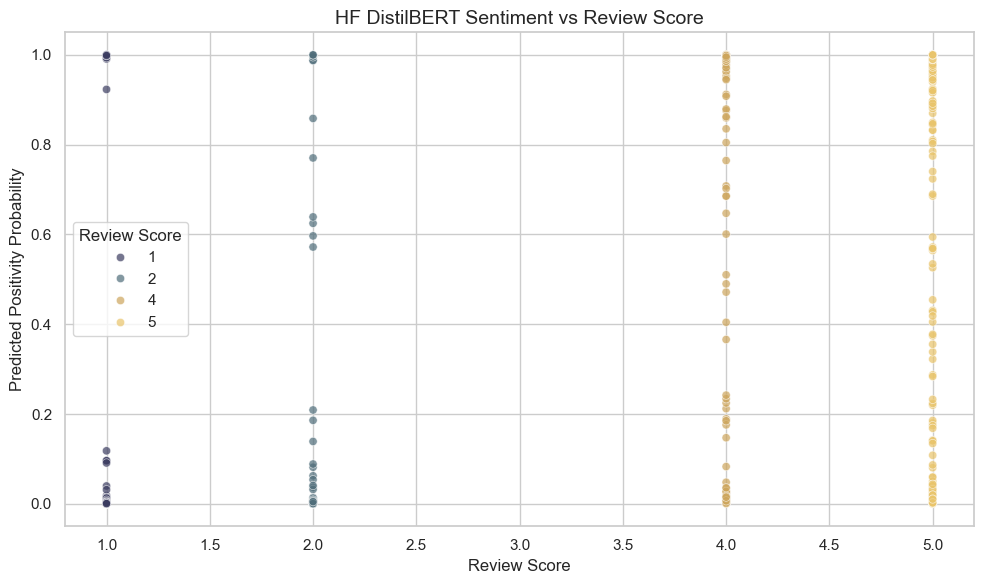

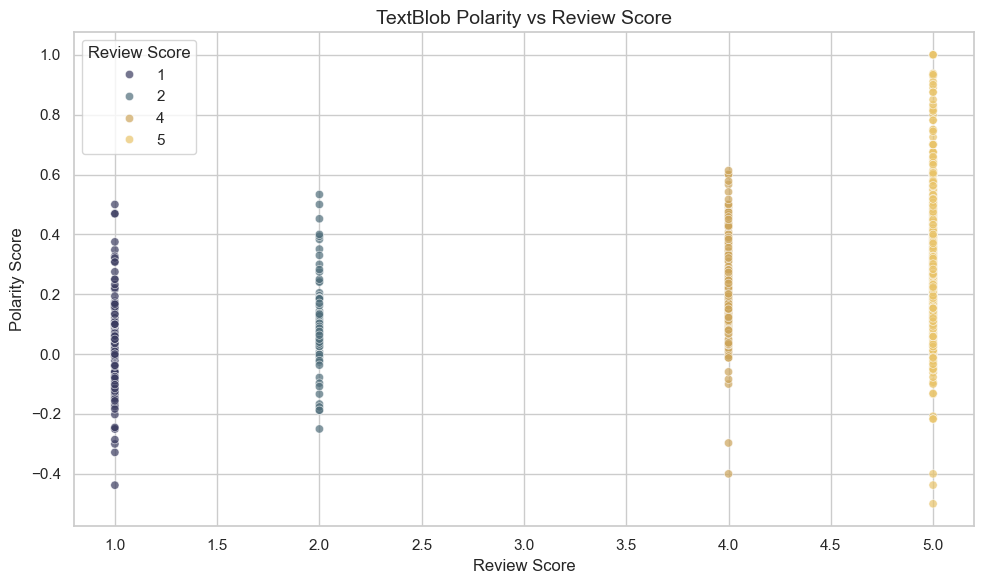

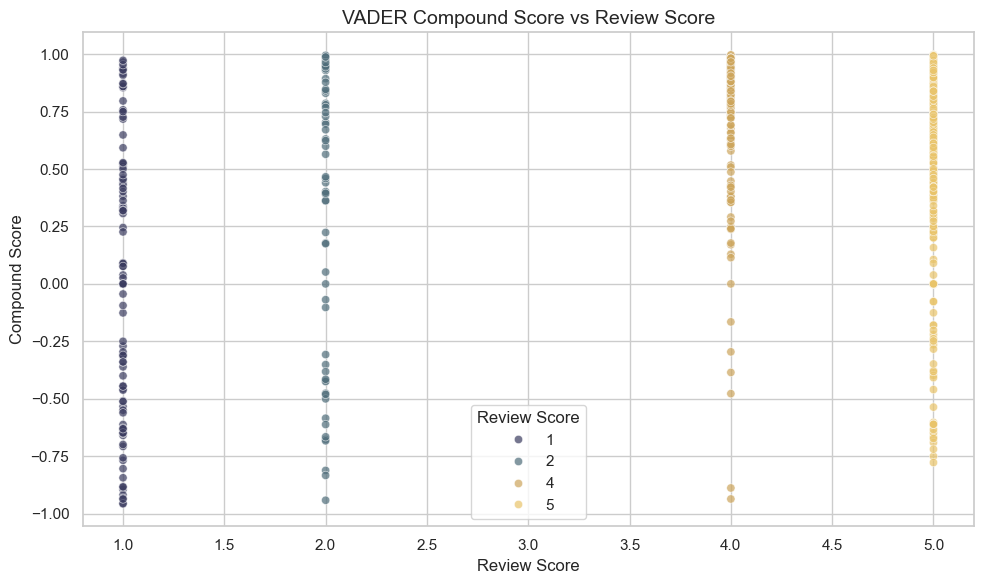

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure Score is integer
df_sample["Score"] = df_sample["Score"].astype(int)

# Define brand palette
custom_palette = {
    1: "#3B3C60",   # deep navy
    2: "#4F6D7A",   # desaturated blue
    3: "#D1B46A",   # optional
    4: "#CDA55B",   # warm mustard
    5: "#E9C46A"    # light gold
}

os.makedirs("../visuals/correlation_plots", exist_ok=True)

# DistilBERT
sns.scatterplot(
    data=df_sample,
    x="Score",
    y="hf_sentiment",
    hue="Score",
    palette=custom_palette,
    alpha=0.7,
    legend="full"
)
plt.title("HF DistilBERT Sentiment vs Review Score", fontsize=14)
plt.xlabel("Review Score")
plt.ylabel("Predicted Positivity Probability")
plt.legend(title="Review Score")
plt.tight_layout()
plt.savefig("../visuals/correlation_plots/hf_vs_score_legend.png")
plt.show()

# TextBlob
sns.scatterplot(
    data=df_sample,
    x="Score",
    y="textblob_polarity",
    hue="Score",
    palette=custom_palette,
    alpha=0.7,
    legend="full"
)
plt.title("TextBlob Polarity vs Review Score", fontsize=14)
plt.xlabel("Review Score")
plt.ylabel("Polarity Score")
plt.legend(title="Review Score")
plt.tight_layout()
plt.savefig("../visuals/correlation_plots/textblob_vs_score_legend.png")
plt.show()

# VADER
sns.scatterplot(
    data=df_sample,
    x="Score",
    y="vader_compound",
    hue="Score",
    palette=custom_palette,
    alpha=0.7,
    legend="full"
)
plt.title("VADER Compound Score vs Review Score", fontsize=14)
plt.xlabel("Review Score")
plt.ylabel("Compound Score")
plt.legend(title="Review Score")
plt.tight_layout()
plt.savefig("../visuals/correlation_plots/vader_vs_score_legend.png")
plt.show()


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/1246899964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette=["#3B3C60", "#E9C46A"])


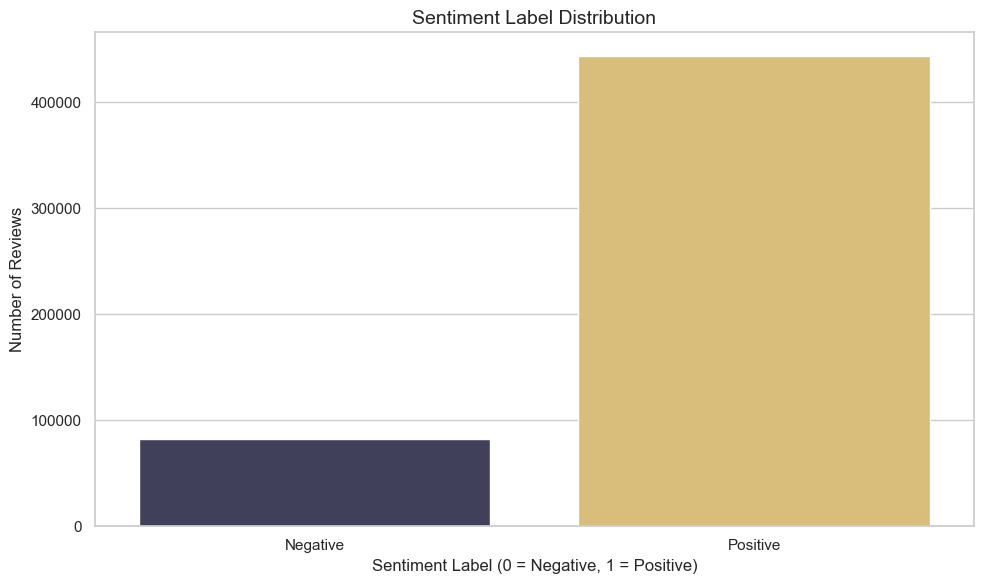

In [31]:
# Make sure visuals folder exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Bar plot: sentiment label distribution
sns.countplot(x="label", data=df, palette=["#3B3C60", "#E9C46A"])
plt.title("Sentiment Label Distribution", fontsize=14)
plt.xlabel("Sentiment Label (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Reviews")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.tight_layout()
plt.savefig("../visuals/histograms/sentiment_label_distribution.png")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marwahfaraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/1721877676.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


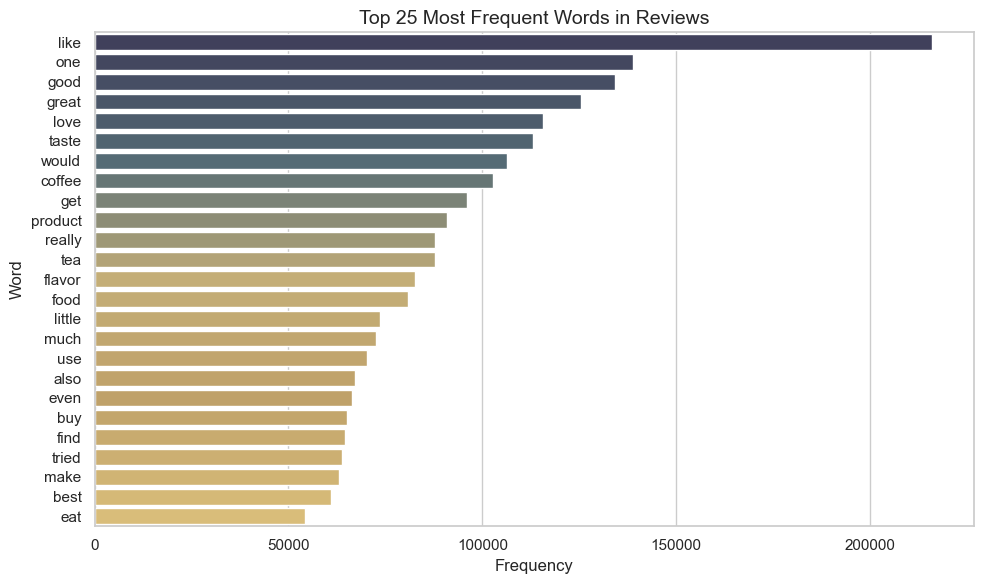

In [32]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Clean and tokenize text
all_words = " ".join(df['Text']).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Top 25 words
word_freq = Counter(filtered_words).most_common(25)
top_words_df = pd.DataFrame(word_freq, columns=["Word", "Frequency"])

# Your 5-color brand palette for gradient
custom_palette = [
    "#3B3C60",  # deep navy
    "#4F6D7A",  # desaturated blue
    "#D1B46A",  # soft gold
    "#CDA55B",  # warm mustard
    "#E9C46A"   # light gold
]

# Interpolate these 5 colors across 25 bars
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

gradient_palette = sns.color_palette(
    LinearSegmentedColormap.from_list("custom_gradient", custom_palette)(np.linspace(0, 1, 25))
)

# Create directory
os.makedirs("../visuals/histograms", exist_ok=True)

# Plot
sns.barplot(
    y="Word",
    x="Frequency",
    data=top_words_df,
    palette=gradient_palette
)
plt.title("Top 25 Most Frequent Words in Reviews", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.savefig("../visuals/histograms/top_25_words.png")
plt.show()


/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/2702134042.py:36: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/var/folders/82/m9t9280x1r134kqynmcb35l40000gn/T/ipykernel_62456/2702134042.py:40: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.savefig("../visuals/histograms/review_volume_over_time_clean.png")
/Users/marwahfaraj/.pyenv/versions/3.10.9/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


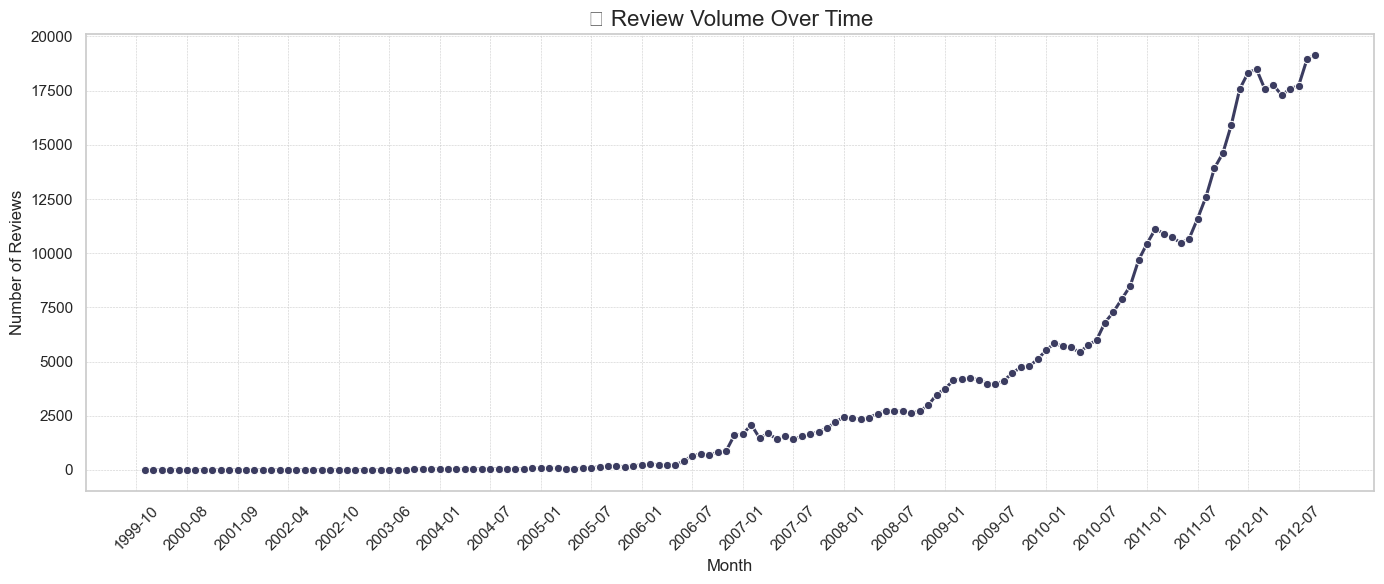

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Convert 'Time' to datetime if not already
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Group by month and count
df['ReviewMonth'] = df['Time'].dt.to_period('M').astype(str)
monthly_counts = df.groupby("ReviewMonth").size().reset_index(name="Review Count")

# Optional: smooth using a 3-month rolling average
monthly_counts["Smoothed Count"] = monthly_counts["Review Count"].rolling(window=3, center=True).mean()

# Clean x labels
x_labels = monthly_counts["ReviewMonth"].tolist()
x_ticks = [x_labels[i] for i in range(0, len(x_labels), 6)]  # show every 6th label

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=monthly_counts,
    x="ReviewMonth",
    y="Smoothed Count",
    marker="o",
    linewidth=2.2,
    color="#3B3C60"
)

plt.title("Review Volume Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(ticks=range(0, len(x_labels), 6), labels=x_ticks, rotation=45)
plt.grid(True, linestyle='--', linewidth=0.4)
plt.tight_layout()

# Save
os.makedirs("../visuals/histograms", exist_ok=True)
plt.savefig("../visuals/histograms/review_volume_over_time_clean.png")
plt.show()


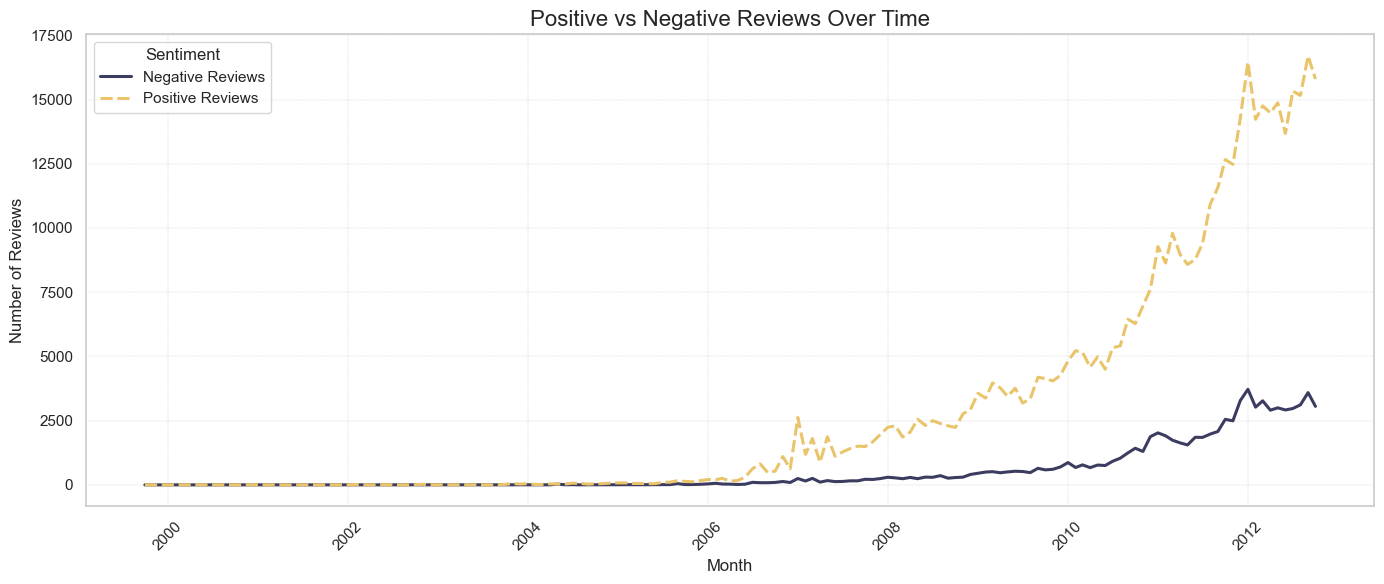

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure visuals folder exists
os.makedirs("../visuals/histograms", exist_ok=True)

# Convert to datetime if not already
df["Time"] = pd.to_datetime(df["Time"], unit='s')
df["ReviewMonth"] = df["Time"].dt.to_period("M").astype(str)

# Group by month and sentiment label
sentiment_ts = df.groupby(["ReviewMonth", "label"]).size().reset_index(name="Review Count")

# Pivot for plotting
sentiment_pivot = sentiment_ts.pivot(index="ReviewMonth", columns="label", values="Review Count").fillna(0)
sentiment_pivot.columns = ["Negative Reviews", "Positive Reviews"]
sentiment_pivot.index = pd.to_datetime(sentiment_pivot.index)

# Smooth if you like (optional)
# sentiment_pivot = sentiment_pivot.rolling(3, center=True).mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=sentiment_pivot, palette=["#3B3C60", "#E9C46A"], linewidth=2.2)
plt.title("Positive vs Negative Reviews Over Time", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.grid(True, linestyle='--', linewidth=0.3)

# Save
plt.savefig("../visuals/histograms/sentiment_trend_over_time.png")
plt.show()


In [39]:
# Make sure 'Time' is in datetime format
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Show the earliest review date
print("📅 Earliest review date in dataset:", df["Time"].min())


📅 Earliest review date in dataset: 1999-10-08 00:00:00


In [40]:
# Make sure 'Time' is in datetime format
df["Time"] = pd.to_datetime(df["Time"], unit='s')

# Show the earliest review date
print("📅 Earliest review date in dataset:", df["Time"].max())


📅 Earliest review date in dataset: 2012-10-26 00:00:00
